<a href="https://colab.research.google.com/github/Sayali-1902/Litmus-Test-WP25/blob/master/250380_Sayali_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Q1) In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [32]:
# Lets import the required libraries
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 5       3       4       0       4       

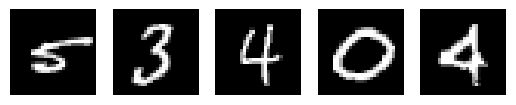

In [3]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [5]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(x_train.shape[0],-1)                                       # flatten the images of training set
x_test_flatten = x_test.reshape(x_test.shape[0],-1)                                        # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation


x_validation, x_training = np.split(x_train_flatten,[10000])
y_validation, y_training = np.split(y_train,[10000])


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [6]:
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax")
])
model.build(input_shape=(None, 784))  # manually build the model

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [7]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

n_epochs = 15              # set number of epochs
batch_size = 100            # you can tweak with these parametrs
history = model.fit(x_training, y_training, validation_data=(x_validation, y_validation), epochs=n_epochs, batch_size = batch_size)

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7550 - loss: 7.5624 - val_accuracy: 0.8814 - val_loss: 0.6400
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9071 - loss: 0.4591 - val_accuracy: 0.9080 - val_loss: 0.4339
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9346 - loss: 0.2576 - val_accuracy: 0.9297 - val_loss: 0.3102
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9506 - loss: 0.1831 - val_accuracy: 0.9404 - val_loss: 0.2834
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9552 - loss: 0.1525 - val_accuracy: 0.9404 - val_loss: 0.2544
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9620 - loss: 0.1275 - val_accuracy: 0.9450 - val_loss: 0.2368
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9641 - loss: 0.1127 - val_accuracy: 0.9468 - val_loss: 0.2521
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9689 - loss: 0.1021 - val_accuracy: 0.

### **Evaluate**
Evaluate your model on test data.

And Show some results

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9594 - loss: 0.1976
Loss =  0.17009469866752625
Accuracy =  96.42999768257141 %


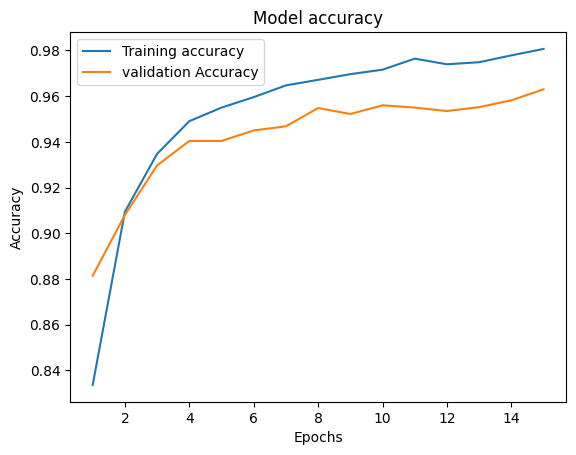

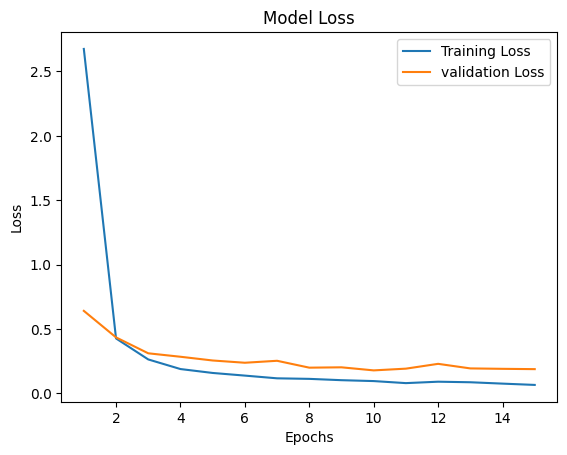

In [8]:
results = model.evaluate(x_test_flatten, y_test, batch_size = 512)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

epochs = range(1, len(history.history["accuracy"]) + 1)

# Plot Accuracy...
plt.plot(epochs, history.history["accuracy"], label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
plt.plot(epochs, history.history["loss"], label="Training Loss")
plt.plot(epochs, history.history["val_loss"], label="validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Lets show our results on images from testing dataset

Actual label: 
4               1               2               0               1               

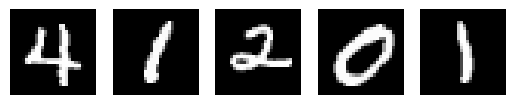

Predicted value: 
4               1               2               0               1               


In [9]:
n = 5   # = no. of images to see predictions on

index = np.random.choice(len(x_test_flatten), n, replace=False)  # choose random index from test data
print("Actual label: ")

for i,ind in enumerate(index):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test[ind], cmap="gray")             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="               ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions


for i,ind in enumerate(index):
  prob = model.predict(x_test[ind].reshape(1,-1), verbose=0)
  digit = np.argmax(prob)
  print(digit,end="               ")
print()

Q2) “Using a Convolutional Neural Network (CNN), access the Iris dataset from the following link (https://www.kaggle.com/datasets/uciml/iris/data
) and build a model to classify the samples into the three species: Iris-setosa, Iris-versicolor, and Iris-virginica. Evaluate the model’s performance and report accuracy, confusion matrix, and classification metrics.”

In [11]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
FEATURES = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

X = df[FEATURES].values
y = df["Species"].values
X.shape       #150 samples with 4 features

(150, 4)

In [27]:
X = X.reshape((150,4,1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)  # Strings → 0,1,2
y_test_enc = le.transform(y_test)


In [29]:
model = Sequential([
    Input(shape=(4,1)),
    Conv1D(filters=32, kernel_size=3, activation="relu", padding = "same"),

    Conv1D(filters=64, kernel_size=3, activation="relu", padding = "same"),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(3, activation= "softmax")
])


model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train_enc, epochs = 50, batch_size = 5, validation_split = 0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4389 - loss: 1.0170 - val_accuracy: 0.5833 - val_loss: 0.7716
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7804 - loss: 0.6554 - val_accuracy: 0.5833 - val_loss: 0.5005
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.4745 - val_accuracy: 0.9167 - val_loss: 0.3232
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9273 - loss: 0.2929 - val_accuracy: 0.7917 - val_loss: 0.2974
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8439 - loss: 0.2703 - val_accuracy: 0.9167 - val_loss: 0.2168
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9542 - loss: 0.2363 - val_accuracy: 0.9583 - val_loss: 0.1286
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9396 - loss: 0.1531 - val_accuracy: 1.0000 - val_loss: 0.0961
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9753 - loss: 0.1358 - val_accuracy: 0.9583 - val_loss

In [31]:
y_pred = model.predict(X_test).argmax(axis=1)
print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_enc, y_pred))
print("Classification Report:\n", classification_report(y_test_enc, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



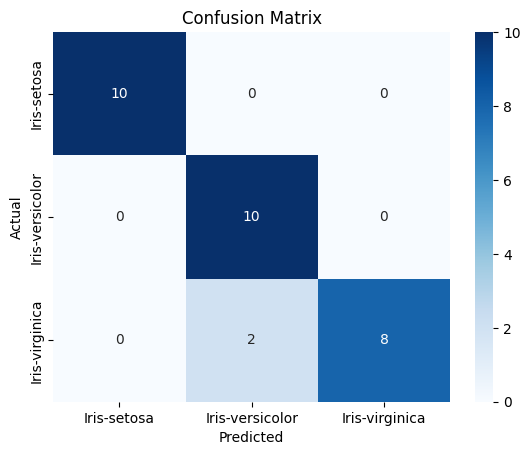

In [34]:
cm = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()